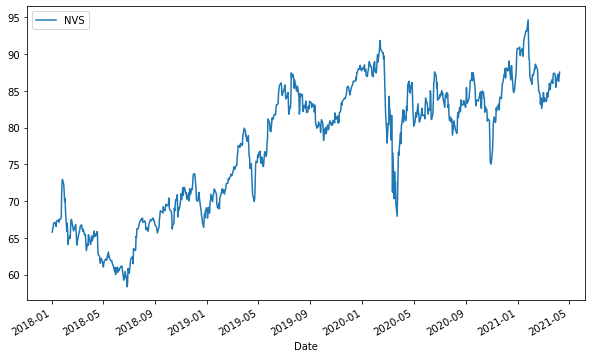

In [1]:
#Import Libraries
import numpy as np  
import pandas as pd  
import pandas_datareader as wb  
import matplotlib.pyplot as plt
import time
from math import log, sqrt, pi, exp
from pandas import DataFrame
from scipy.stats import norm
from datetime import datetime, date
%matplotlib inline


#Settings for Monte Carlo asset data, how long, and how many forecasts 
ticker = 'NVS' # ticker
#t_intervals = 30 # time steps forecasted into future
#iterations = 100 # amount of simulations
#Acquiring data

data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2018-1-1')['Adj Close']

#Preparing log returns from data
log_returns = np.log(1 + data.pct_change())
#Plot of asset historical closing price
data.plot(figsize=(10, 6));


--- 0.04 seconds ---


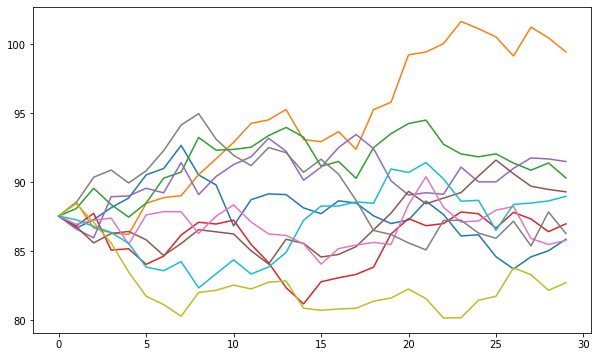

In [41]:
#Setting up drift and random component in relation to asset data
import time
start_time = time.time()
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()
t_intervals = 30 # time steps forecasted into future
iterations = 10 # amount of simulations
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
#Takes last data point as startpoint point for simulation
S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
#Applies Monte Carlo simulation in asset
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

#Plot simulations
plt.figure(figsize=(10,6))
plt.plot(price_list);

time = round(time.time()-start_time,2)



print("--- %s seconds ---" % time)

In [35]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2)*T)/(sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

In [36]:
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma))-S*norm.cdf(-d1(S,K,T,r,sigma))

In [51]:
cp = input("Willst du einen Call (c) oder einen Put (p) berechnen?");
expiry = input("Verfall (mm-dd-yyyy): ")#'04-16-2021'

df = wb.DataReader(ticker, data_source='yahoo', start='2018-1-1')
df = df.sort_values(by="Date")
df = df.dropna()
df = df.assign(close_day_before=df.Close.shift(1))
df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)

S = price_list[-1].mean()
strike_price = float(input("Strike: "))
sigma = np.sqrt(252) * df['returns'].std()
r = -0.0028
t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365

if (cp == "c"):
    print('The Option Price is: ', round(bs_call(S, strike_price, t, r, sigma),2))
else:
    print('The Option Price is: ', round(bs_put(S, strike_price, t, r, sigma),2))

Willst du einen Call (c) oder einen Put (p) berechnen?p
Verfall (mm-dd-yyyy): 04-16-2021
Strike: 92.50
The Option Price is:  3.81
